********************* Analysis Of The Data ****************************************

	 Boxplot Analysis



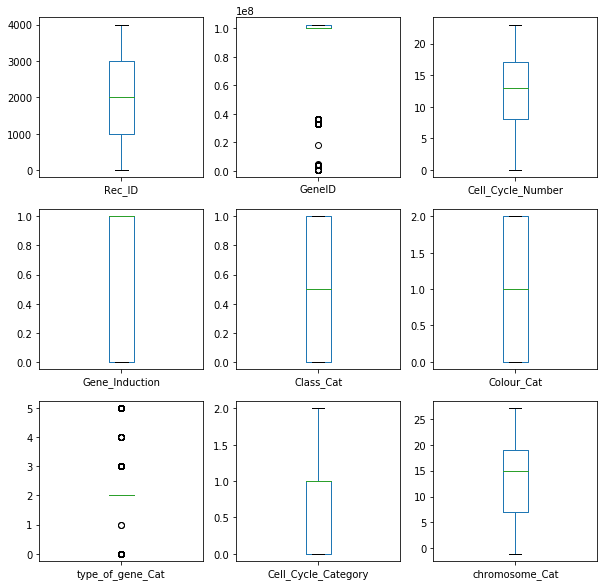

	 Histogram Analysis



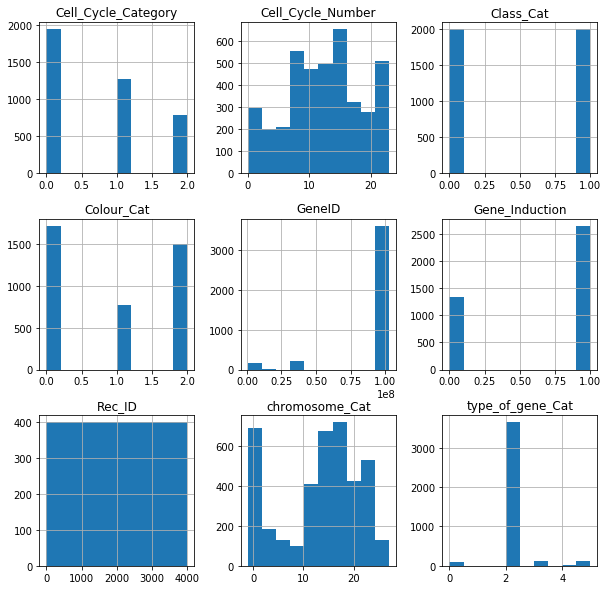

	 Scatter Matrix Analysis



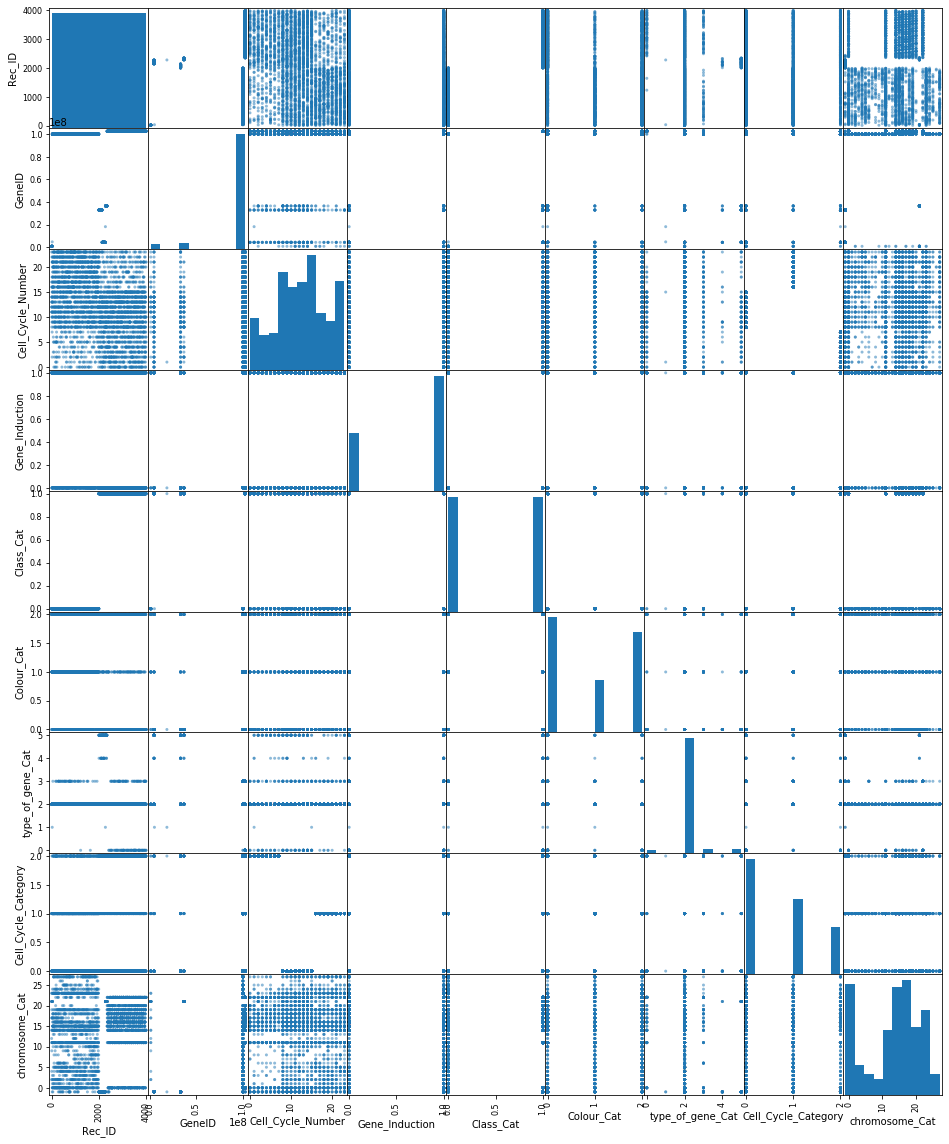

****************************************** Analysis Of The Classifier Algorithms *********************************** 

Name: LogisticRegression, Mean: 0.781786, Standard Deviation :0.024715
Name: LinearDiscriminantAnalysis, Mean: 0.778929, Standard Deviation :0.027593
Name: KNeighborsClassifier, Mean: 0.833929, Standard Deviation :0.027258
Name: DecisionTreeClassifier, Mean: 0.831071, Standard Deviation :0.026871
Name: GaussianNB, Mean: 0.732857, Standard Deviation :0.015633
Name: SVC, Mean: 0.850000, Standard Deviation :0.023255
Name: RandomForestClassifier, Mean: 0.843214, Standard Deviation :0.025377


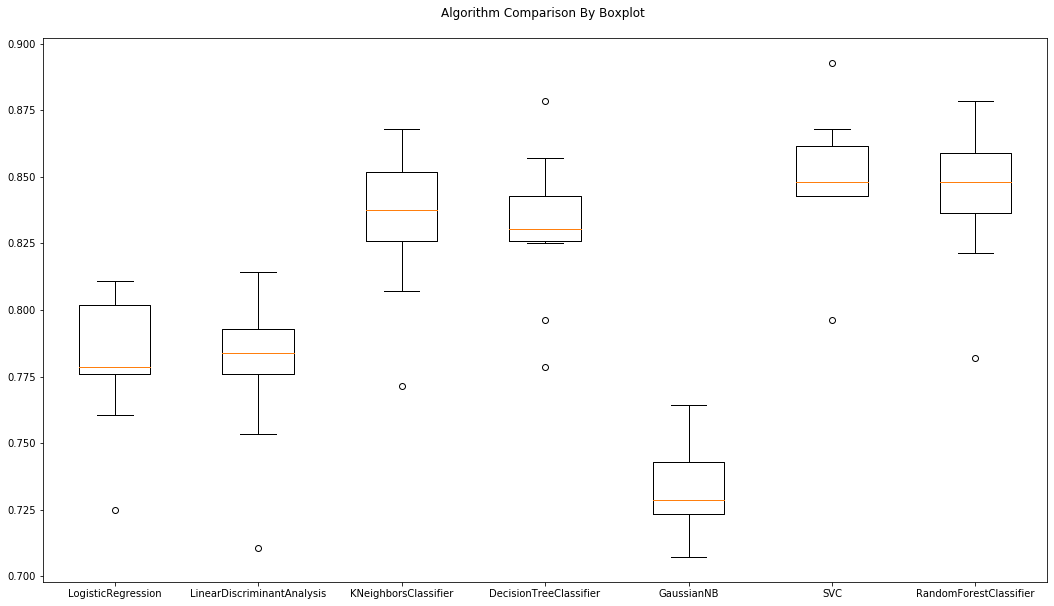

************************************************ Prediction Results *****************************************

Accuracy Score :
 0.8575 

Confusion Matrix:
 [[511 105]
 [ 66 518]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       616
           1       0.83      0.89      0.86       584

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200
 



In [42]:
import pandas as pd
import requests
import io
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/ravikanthranjith/BITS-DM-ASSIGNMENT/master/GeneData.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df_gene = pd.read_csv(io.StringIO(download.decode('utf-8')))

#Replacing the '-' values with NaN
df_gene=df_gene.replace('-', np.nan)
#.astype("object")

#Getting Percentages of the Missing values in the respective columns
total = df_gene.isnull().sum().sort_values(ascending=False)
percent_1 = df_gene.isnull().sum()/df_gene.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

#Converting all the Category columns
df_gene["Class"] = df_gene["Class"].astype('category') # This is the Prediction class
df_gene["Colour"] = df_gene["Colour"].astype('category')#Colour 
df_gene["type_of_gene"] = df_gene["type_of_gene"].astype('category')#Type of Gene
df_gene["Cell_Cycle_Cat"] = df_gene["Cell_Cycle_Cat"].astype('category')#Cell_Cycle_Cat
df_gene["Cell_Cycle_Number"] = df_gene["Cell_Cycle_Number"].astype('category')#Cell_Cycle_Number
df_gene["chromosome"] = df_gene["chromosome"].astype('category')#chromosome

#Creation of "_Cat" Columns based on the columns converted as categories
df_gene["Class_Cat"] = df_gene["Class"].cat.codes
df_gene["Colour_Cat"] = df_gene["Colour"].cat.codes
df_gene["type_of_gene_Cat"] = df_gene["type_of_gene"].cat.codes
df_gene["Cell_Cycle_Category"] = df_gene["Cell_Cycle_Cat"].cat.codes#cell_Cycle_Cat
df_gene["Cell_Cycle_Number"] = df_gene["Cell_Cycle_Number"].cat.codes#cell_Cycle_Number
df_gene["chromosome_Cat"] = df_gene["chromosome"].cat.codes#chromosome

#Analysis of data
title_str='********************* Analysis of the data ****************************************'
print(title_str.title())

#boxplot
#df_gene.boxplot(column = 'Cell_Cycle_Number',return_type='axes')
df_gene.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))
print('\n\t Boxplot Analysis\n')
pyplot.show()

#histogram
df_gene.hist(figsize=(10,10))
print('\t Histogram Analysis\n')
pyplot.show()

#scatter matrix
scatter_matrix(df_gene,figsize=(16,20))
print('\t Scatter Matrix Analysis\n')
pyplot.show()

#Importing the scikit for the classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Considering only the required columns Names
feature_col_names = ['Cell_Cycle_Category','Cell_Cycle_Number','chromosome_Cat','Colour_Cat','Gene_Induction','type_of_gene_Cat']

#Defining the X and Y variables
X=df_gene[feature_col_names]
Y=df_gene.Class_Cat

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

# Compare Algorithms
title_str='****************************************** Analysis of the classifier algorithms *********************************** \n'
print(title_str.title())

# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('RandomForestClassifier',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('Name: %s, Mean: %f, Standard Deviation :%f' % (name, cv_results.mean(), cv_results.std()))

pyplot.figure(figsize=(18,10))
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison By Boxplot \n')
pyplot.show()

# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
# Evaluate predictions
title_str='************************************************ Prediction Results with SVC **********************************\n'
print(title_str.title())

print('Accuracy Score :\n', accuracy_score(Y_test, predictions),'\n')
print('Confusion Matrix:\n', confusion_matrix(Y_test, predictions),'\n')
print('Classification Report:\n',classification_report(Y_test, predictions),'\n')